<a href="https://colab.research.google.com/github/saykim/AI_ML_DS/blob/main/ml_regression_%EC%98%88%EC%8B%9C%EC%BD%94%EB%93%9C_240312.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 예시코드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='gulim') #그래프 한글


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
import xgboost
import lightgbm
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error


# 생략된 코드 (라이브러리 불러오기 및 데이터 로드)

# 전처리 과정
xdata_dummies = pd.get_dummies(xdata, columns=['프로젝트유형', '단납기여부'])
X_train, X_test, y_train, y_test = train_test_split(xdata_dummies, ydata, test_size=.3, random_state=44)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train[X_train.columns] = X_train_scaled
X_test[X_test.columns] = X_test_scaled

# 모델 학습 및 평가 함수
def reg(model_class, X, y, model_params={}):
  model = model_class(**model_params)
  model.fit(X, y)
  scores = cross_val_score(model, X, y, cv=cv)
  print('cross-val-score\n{}'.format(scores))
  print('cross-val-score.mean\n{:.3f}'.format(scores.mean()))
  print('-----Y_Prediction-----')
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = metrics.mean_absolute_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)
  print('prediction MSE: \n{:.3f}'.format(mse))
  print('prediction RMSE: \n{:.3f}'.format(rmse))
  print('prediction MAE: \n{:.3f}'.format(mae))
  print('prediction r2 : \n{:.3f}'.format(r2))
  print('---------------------')
  return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

# 모델 리스트와 파라미터 설정
models = [
  (LinearRegression, {}),
  (ElasticNet, {'alpha': 0.1, 'l1_ratio': 0.5}),
  (KNeighborsRegressor, {}),
  (RandomForestRegressor, {'max_depth': 6, 'n_jobs': -1}),
  (DecisionTreeRegressor, {}),
  (xgboost.XGBRegressor, {'max_depth': 5, 'n_jobs': -1}),
  (lightgbm.LGBMRegressor, {'objective': 'regression', 'learning_rate': 0.01, 'n_estimators': 500})
]

# 모델 학습 및 평가
results = {}
for model_class, model_params in models:
  model_name = model_class.__name__
  print(model_name)
  result = reg(model_class, X_train, y_train, model_params)
  results[model_name] = result

# 결과 출력
results_df = pd.DataFrame(results).T
results_df = results_df.round(2)
print(results_df)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='gulim') #그래프 한글


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
import xgboost
import lightgbm
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('./dataset/only_accident_dataset_210201.csv', encoding='cp949')
df

,대상,속도,인승,정지층수,프로젝트유형,단납기여부,착공수,사고수,사고ppm
0,HSVF,150,24,22,리모델링,일반,3,1,333333
1,HSVF,210,20,33,리모델링,일반,2,1,500000
2,LXVF,60,7,5,리모델링,STO,360,2,5556
3,LXVF,60,8,8,리모델링,일반,122,2,16393
4,LXVF,60,8,10,리모델링,일반,118,1,8475
...,...,...,...,...,...,...,...,...,...
57,WBSS,60,15,5,신규,STO,956,1,1046
58,WBSS,60,15,7,신규,일반,239,1,4184
59,WBSS,60,17,2,리모델링,STO,11,1,90909
60,WBSS,60,21,5,신규,STO,40,1,25000


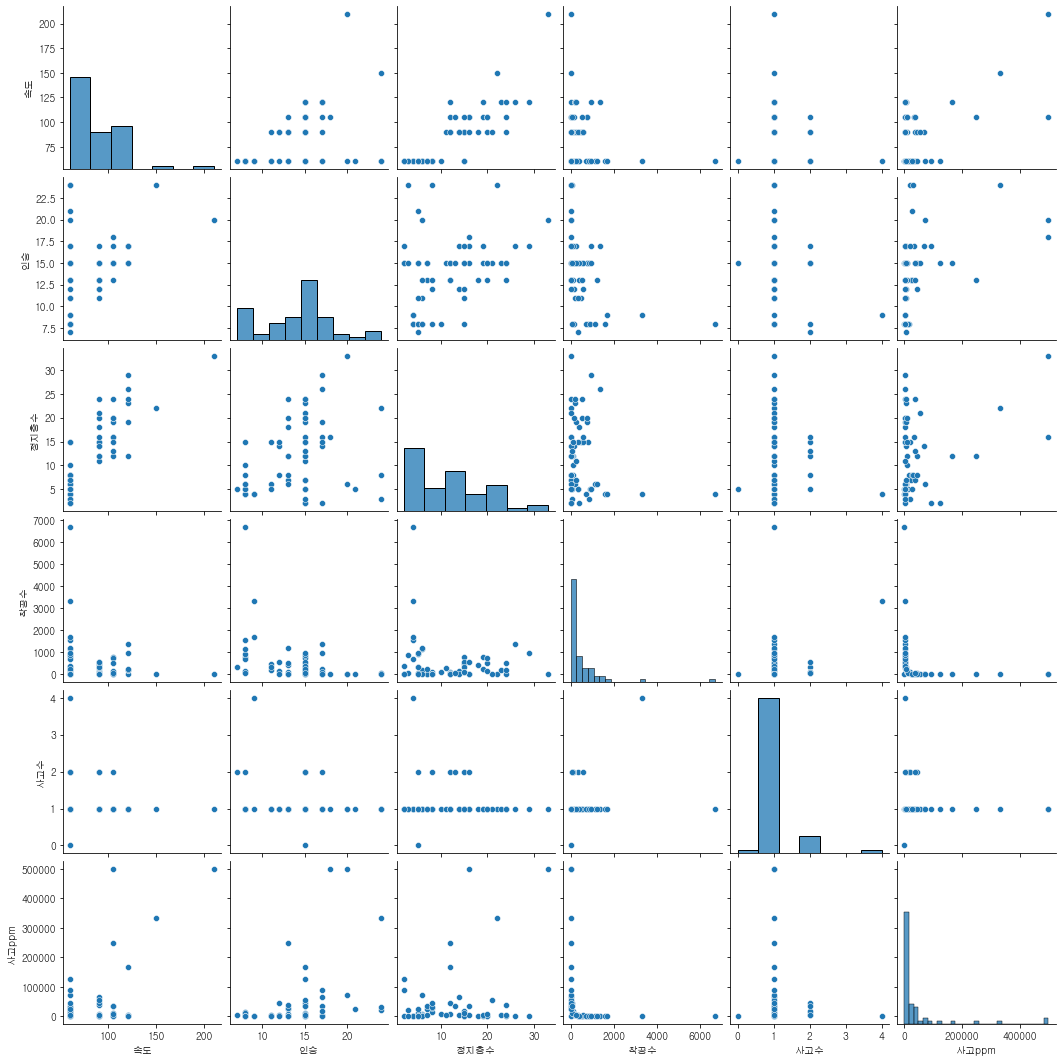

In [ ]:
sns.pairplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대상      6812 non-null   object 
 1   속도      6812 non-null   int64  
 2   인승      6812 non-null   int64  
 3   정지층수    6812 non-null   int64  
 4   프로젝트유형  6812 non-null   object 
 5   단납기여부   6812 non-null   object 
 6   착공수     6812 non-null   int64  
 7   사고수     62 non-null     float64
 8   사고ppm   6812 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 479.1+ KB


In [ ]:
df.columns

Index(['대상', '속도', '인승', '정지층수', '프로젝트유형', '단납기여부', '착공수', '사고수', '사고ppm'], dtype='object')

In [ ]:
xdata=df[['대상', '속도', '인승', '정지층수', '프로젝트유형', '단납기여부']]
ydata = df[['사고ppm']]

In [ ]:
# xdata=df[['대상', '속도', '인승', '프로젝트유형', '단납기여부']]
# ydata = df[['사고ppm']]

In [ ]:
xdata_dummies= pd.get_dummies(xdata)
xdata_dummies

,속도,인승,정지층수,대상_HSVF,대상_LXVF,대상_SSVF,대상_STVF,대상_WBSS,프로젝트유형_리모델링,프로젝트유형_신규,단납기여부_STO,단납기여부_일반
0,150,24,22,1,0,0,0,0,1,0,0,1
1,210,20,33,1,0,0,0,0,1,0,0,1
2,60,7,5,0,1,0,0,0,1,0,1,0
3,60,8,8,0,1,0,0,0,1,0,0,1
4,60,8,10,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
57,60,15,5,0,0,0,0,1,0,1,1,0
58,60,15,7,0,0,0,0,1,0,1,0,1
59,60,17,2,0,0,0,0,1,1,0,1,0
60,60,21,5,0,0,0,0,1,0,1,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xdata_dummies, ydata, test_size=.3, random_state=44)

In [ ]:
#scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(data = X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(data = X_test_scaled, columns=X_test.columns)


In [ ]:
lr = LinearRegression()
knn = KNeighborsRegressor()
rfr = RandomForestRegressor(max_depth=6,n_jobs=-1)
dtr = DecisionTreeRegressor()
elnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
gbr = GradientBoostingRegressor(max_depth=5, n_estimators=120)
xgb = xgboost.XGBRegressor(max_depth=5, n_jobs=-1)
lgm = lightgbm.LGBMRegressor(objective='regression', learning_rate=0.01, n_estimators=500)

In [ ]:
cv = KFold(5, shuffle=True, random_state=42)
def reg(model, X, y):
    model.fit(X, y)
    scores = cross_val_score(model, X, y,cv=cv)
    print('cross-val-score\n{}'.format(scores))
    print('cross-val-score.mean\n{:.3f}'.format(scores.mean()))
    print('-----Y_Prediction-----')
    #Y_pred 결과
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)

    #예측 결과 저장
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)
    r2s.append(r2)

    # 예측 결과 보여주기
    print('prediction MSE: \n{:.3f}'.format(mse))
    print('prediction RMSE: \n{:.3f}'.format(rmse))
    print('prediction MAE: \n{:.3f}'.format(mae))
    print('prediction r2 : \n{:.3f}'.format(r2))
    print('---------------------')

mses = []
rmses = []
maes = []
r2s = []

list = [lr, elnet ,knn, rfr, dtr, xgb, lgm]

for i in list:
    print(i)
    reg(i, X_train, y_train)

results = pd.DataFrame(index=['lr','elnet' ,'knn', 'rfr', 'dtr', 'xgb', 'lgm'])
results['mse'] = pd.DataFrame(mses, index=['lr','elnet' ,'knn', 'rfr', 'dtr', 'xgb', 'lgm'])
results['rmse'] = pd.DataFrame(rmses, index=['lr','elnet' ,'knn', 'rfr', 'dtr', 'xgb', 'lgm'])
results['mae'] = pd.DataFrame(maes, index=['lr','elnet' ,'knn', 'rfr', 'dtr', 'xgb', 'lgm'])
results['r2'] = pd.DataFrame(r2s, index=['lr','elnet' ,'knn', 'rfr', 'dtr', 'xgb', 'lgm'])

results.round(2)

LinearRegression()
cross-val-score
[ -1.21808813 -46.06009488   0.11886114   0.80538417   0.58708384]
cross-val-score.mean
-9.153
-----Y_Prediction-----
prediction MSE: 
3319310955.151
prediction RMSE: 
57613.462
prediction MAE: 
47663.717
prediction r2 : 
0.470
---------------------
ElasticNet(alpha=0.1)
cross-val-score
[ -0.62054315 -37.72839688   0.10995334   0.63047323   0.4581147 ]
cross-val-score.mean
-7.430
-----Y_Prediction-----
prediction MSE: 
3114978226.468
prediction RMSE: 
55811.990
prediction MAE: 
44418.358
prediction r2 : 
0.503
---------------------
KNeighborsRegressor()
cross-val-score
[ 3.79727405e-01 -4.88275448e+01  2.70636716e-02  2.49615819e-01
  1.82586719e-01]
cross-val-score.mean
-9.598
-----Y_Prediction-----
prediction MSE: 
1847110386.347
prediction RMSE: 
42978.022
prediction MAE: 
33659.905
prediction r2 : 
0.705
---------------------
RandomForestRegressor(max_depth=6, n_jobs=-1)
cross-val-score
[ 0.24220175 -2.71613204  0.32796025  0.80452427 -0.21884459]

,mse,rmse,mae,r2
lr,3.319311e+09,57613.46,47663.72,0.47
elnet,3.114978e+09,55811.99,44418.36,0.50
knn,1.847110e+09,42978.02,33659.91,0.71
rfr,4.367907e+08,20899.54,14686.63,0.93
dtr,2.157803e+09,46452.15,24959.95,0.66
xgb,2.176007e+09,46647.69,24128.82,0.65
lgm,6.178365e+09,78602.58,56313.51,0.01


Text(0, 0.5, 'Featrues')

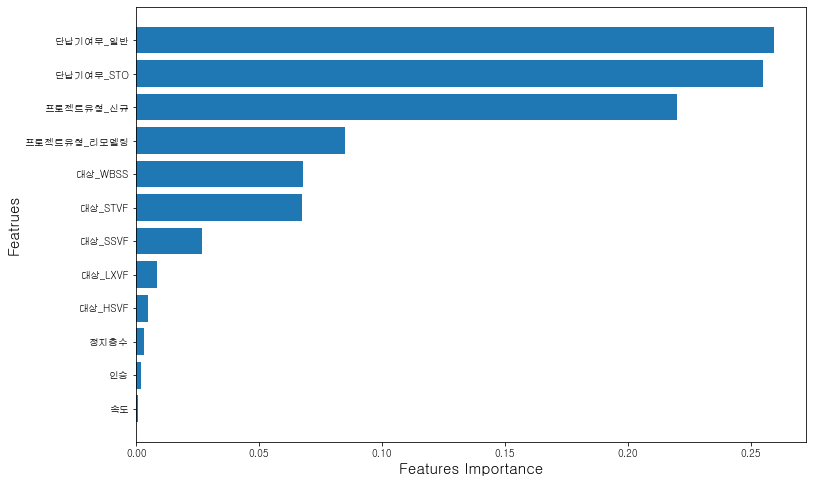

In [ ]:
sorted_idx = rfr.feature_importances_.argsort()

plt.figure(figsize=(12,8))
plt.barh(X_train.columns, rfr.feature_importances_[sorted_idx], align='center')
plt.xlabel('Features Importance', size=15)
plt.ylabel('Featrues', size=15)

In [ ]:
X_train.head()

,속도,인승,정지층수,대상_HSVF,대상_LXVF,대상_SSVF,대상_STVF,대상_WBSS,프로젝트유형_리모델링,프로젝트유형_신규,단납기여부_STO,단납기여부_일반
0,0.0,0.5625,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0625,0.064516,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.4,0.4375,0.709677,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.4375,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,0.5625,0.419355,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


#### statsmodels

In [ ]:
import statsmodels
import statsmodels.api as sm

In [ ]:
df_ols = pd.get_dummies(df)

In [ ]:
stats_scaler = StandardScaler()
df_ols_sclaer = stats_scaler.fit_transform(df_ols)
df_ols_sclaer = pd.DataFrame(data = df_ols_sclaer, columns=df_ols.columns)
df_ols_sclaer

,속도,인승,정지층수,착공수,사고수,사고ppm,대상_HSVF,대상_LXVF,대상_SSVF,대상_STVF,대상_WBSS,프로젝트유형_리모델링,프로젝트유형_신규,단납기여부_STO,단납기여부_일반
0,2.359582,2.477332,1.330869,-0.516351,-0.262613,2.864398,5.477226,-0.968246,-0.327327,-0.3849,-0.589768,1.176697,-1.176697,-0.690066,0.690066
1,4.456988,1.494327,2.785440,-0.517381,-0.262613,4.510587,5.477226,-0.968246,-0.327327,-0.3849,-0.589768,1.176697,-1.176697,-0.690066,0.690066
2,-0.786527,-1.700441,-0.917105,-0.148602,1.772637,-0.373093,-0.182574,1.032796,-0.327327,-0.3849,-0.589768,1.176697,-1.176697,1.449138,-1.449138
3,-0.786527,-1.454689,-0.520404,-0.393768,1.772637,-0.266054,-0.182574,1.032796,-0.327327,-0.3849,-0.589768,1.176697,-1.176697,-0.690066,0.690066
4,-0.786527,-1.454689,-0.255936,-0.397888,-0.262613,-0.344261,-0.182574,1.032796,-0.327327,-0.3849,-0.589768,1.176697,-1.176697,-0.690066,0.690066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,-0.786527,0.265570,-0.917105,0.465344,-0.262613,-0.417638,-0.182574,-0.968246,-0.327327,-0.3849,1.695582,-0.849837,0.849837,1.449138,-1.449138
58,-0.786527,0.265570,-0.652637,-0.273245,-0.262613,-0.386644,-0.182574,-0.968246,-0.327327,-0.3849,1.695582,-0.849837,0.849837,-0.690066,0.690066
59,-0.786527,0.757073,-1.313806,-0.508110,-0.262613,0.469949,-0.182574,-0.968246,-0.327327,-0.3849,1.695582,1.176697,-1.176697,1.449138,-1.449138
60,-0.786527,1.740078,-0.917105,-0.478237,-0.262613,-0.181042,-0.182574,-0.968246,-0.327327,-0.3849,1.695582,-0.849837,0.849837,1.449138,-1.449138


In [ ]:
stats_data = df_ols_sclaer.copy()

In [ ]:
stats_data['intercept'] = 1

In [ ]:
stats_data.columns

Index(['속도', '인승', '정지층수', '착공수', '사고수', '사고ppm', '대상_HSVF', '대상_LXVF',
       '대상_SSVF', '대상_STVF', '대상_WBSS', '프로젝트유형_리모델링', '프로젝트유형_신규',
       '단납기여부_STO', '단납기여부_일반', 'intercept'],
      dtype='object')

In [ ]:
lm = sm.OLS(stats_data['사고ppm'], stats_data[['속도', '인승', '정지층수', '착공수', '사고수', '대상_HSVF', '대상_LXVF','대상_SSVF', '대상_STVF', '대상_WBSS', '프로젝트유형_리모델링', '프로젝트유형_신규','단납기여부_STO', '단납기여부_일반', 'intercept']])

In [ ]:
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  사고ppm   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     7.564
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           1.83e-07
Time:                        17:15:38   Log-Likelihood:                -57.600
No. Observations:                  62   AIC:                             139.2
Df Residuals:                      50   BIC:                             164.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
속도              0.7189      0.223      3.227      0.002       0.271       1.166
인승              0.1539      0.110      1.394      0.170      -0.068       0.376
정지층수           -0.4939      0.200     -2.473      0.017      -0.895      -0.093
착공수            -0.0041      0.108     -0.038      0.970      -0.221       0.213
사고수            -0.0047      0.092     -0.051      0.959      -0.189       0.180
대상_HSVF         0.2707      0.133      2.035      0.047       0.003       0.538
대상_LXVF        -0.0677      0.076     -0.889      0.378      -0.220       0.085
대상_SSVF        -0.0125      0.082     -0.152      0.880      -0.178       0.153
대상_STVF        -0.0341      0.077     -0.443      0.659      -0.188       0.120
대상_WBSS         0.0025      0.090      0.028      0.978      -0.179       0.184
프로젝트유형_리모델링     0.1527      0.058      2.622      0.012       0.036       0.270
프로젝트유형_신규      -0.1527      0.058     -2.622      0.012      -0.270      -0.036
단납기여부_STO      -0.0154      0.061     -0.255      0.800      -0.137       0.106
단납기여부_일반        0.0154      0.061      0.255      0.800      -0.106       0.137
intercept    4.857e-17      0.087   5.61e-16      1.000      -0.174       0.174
==============================================================================
Omnibus:                       83.789   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1267.680
Skew:                           3.802   Prob(JB):                    5.33e-276
Kurtosis:                      23.806   Cond. No.                     1.60e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
lm1 = sm.OLS(stats_data['사고ppm'], stats_data[[ 'intercept','속도', '인승', '정지층수', '프로젝트유형_리모델링', '프로젝트유형_신규']])
results1 = lm1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  사고ppm   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     19.52
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           3.67e-10
Time:                        17:17:09   Log-Likelihood:                -61.231
No. Observations:                  62   AIC:                             132.5
Df Residuals:                      57   BIC:                             143.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    6.245e-17      0.086   7.26e-16      1.000      -0.172       0.172
속도              1.0293      0.173      5.939      0.000       0.682       1.376
인승              0.1841      0.096      1.923      0.059      -0.008       0.376
정지층수           -0.6756      0.166     -4.082      0.000      -1.007      -0.344
프로젝트유형_리모델링     0.1674      0.043      3.865      0.000       0.081       0.254
프로젝트유형_신규      -0.1674      0.043     -3.865      0.000      -0.254      -0.081
==============================================================================
Omnibus:                       56.488   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              378.998
Skew:                           2.434   Prob(JB):                     5.03e-83
Kurtosis:                      14.091   Cond. No.                     6.75e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.98e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""